In [2]:
pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   - -------------------------------------- 11.0/331.8 MB 52.9 MB/s eta 0:00:07
   -- ------------------------------------- 21.5/331.8 MB 52.3 MB/s eta 0:00:06
   --- ------------------------------------ 32.5/331.8 MB 51.6 MB/s eta 0:00:06
   ----- ---------------------------------- 42.7/331.8 MB 51.3 MB/s eta 0:00:06
   ------ --------------------------------- 53.5/331.8 MB 50.9 MB/s eta 0:00:06
   ------- -------------------------------- 64.5/331.8 MB 51.4 MB/s eta 0:00:06
   --------- -----

In [3]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [4]:
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [5]:
digitos = load_digits()
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
digitos["data"][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
digitos["data"][0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

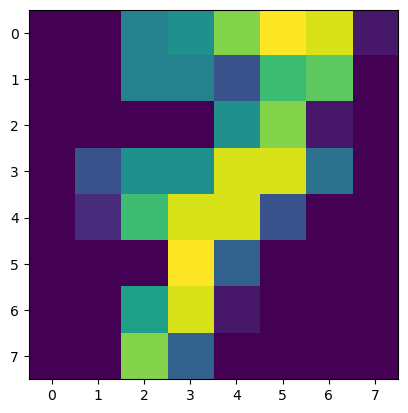

In [13]:
plt.imshow(digitos["data"][7].reshape(8,8))

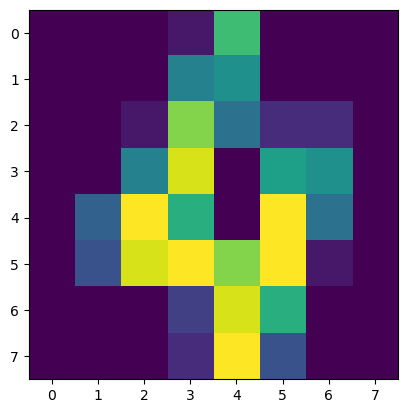

In [16]:
plt.imshow(digitos.images[4]);

In [23]:
X = digitos.data
X.max()

16.0

normalizo los valores. Como los valores del data set van entre 0 y 16, lo que hago es dividirlos por 16. De esa manera me aseguro que TODOS los valores van a quedar encerrados entre el 0 y 1 facilitando la tarea del programa

In [25]:
X = X / 16.0

In [47]:
X_entrena, X_prueba = train_test_split(X, train_size=0.2, random_state = 42)

A continuacion vamos a generar la entrada de valores para el autoencoder. Lo que hacemos es generar una variable la cual va a guardar el formato en el que va a recibir la informacion el autoencoder.
Si bien nosotros vemos la imagen en una distribucion de 8x8, como hicimos mas arriba, el modelo de prediccion necesita verlo en una disposicion que sea aplanada de 64x1

In [48]:
imagen_entrada = Input(shape=(64, ))

In [49]:
codificado = Dense(32, activation = "relu")(imagen_entrada)

32 es la cantidad de nodos que establecemos a generar en la red neuronal. Si pongo muchos, puedo perder la idea de aprender la relacion general, aprendiendo tambien el ruido de los datos. Si pongo muy pocos, puedo correr riesgo de ni siquiera aprender en base a esos datos.

activation="relu" es la manera en la que van a establecerse las relaciones de dicha red

imagen_entrada es el formato que generamos para que el modelo pueda entender el ingreso de los valores

In [50]:
decodificado = Dense(64, activation = "sigmoid")(codificado)

In [51]:
autoencoder = Model(imagen_entrada, decodificado)

In [52]:
autoencoder.compile(optimizer = "adam", loss="binary_crossentropy")

In [53]:
autoencoder.fit(X_entrena,
                X_entrena,
                epochs = 100,
                batch_size=256,
               shuffle = True,
               validation_data = (X_prueba, X_prueba))

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - loss: 0.6923 - val_loss: 0.6907
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.6904 - val_loss: 0.6888
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.6885 - val_loss: 0.6869
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.6866 - val_loss: 0.6848
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.6846 - val_loss: 0.6827
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.6824 - val_loss: 0.6805
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.6802 - val_loss: 0.6782
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.6778 - val_loss: 0.6757
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.6753 - val_loss: 0.6730
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.6726 - val_loss: 0.6701
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.6697 - val_loss: 0.6670
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.6665 - val_

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


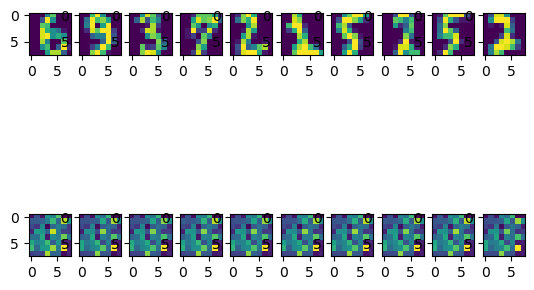

In [54]:
for i in range(0,10):
    plt.subplot(2,
               10,
               i+1)
    plt.imshow(X_prueba[i].reshape(8,8))
    plt.subplot(2,
                10,
                i+1+10)
    plt.imshow(autoencoder.predict(X_prueba)[i].reshape(8,8));